<a href="https://colab.research.google.com/github/AlphaZero28/disorder-cystal-generation/blob/main/design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script explores the variance of elements for a crystal. For a periodic and hyperuniform crystal, the variance is governed by this equation. 

  $$
  σ^2(R) ∼ R^{d}
  $$ 

In hyperuniform system, variance grows more slowly than $R^d$.

In [ ]:
#@title Import packages
# basic imports
import matplotlib.pyplot as plt
import numpy as np
import math
import random as rd

In [ ]:
#@title Variance Calucation Function
def calculate_variance(num_list):
  '''this function calculates the variance of a given list of data '''

  num_len = len(num_list)
  arr = np.array(num_list)
  sum_nums = np.sum(arr)
  mean_val = sum_nums/num_len

  sum_diff = 0
  for val in num_list:
    diff = (mean_val - val)**2
    sum_diff = sum_diff + diff

  var = sum_diff/num_len
  # print(var)
  return var


In [ ]:
#@title Periodic Cystal Generation Function
def generate_periodic_crystal(Lx, Ly, a, title='Periodic Crystal'):
  '''This function generate a crystal with the given data. Lx, Ly = length of the cystal. 
  a = lattice constant. returns coordniates of each element.'''

  figure, axes = plt.subplots()

  coords = []
  for i in np.arange(0,Lx,1):
    for j in np.arange(0,Ly,1):
      x = a + a*i 
      y = a + a*j

      coords.append((x,y))
      dot_radius = 0.1
      dot_color = 'blue'

      dots = plt.Circle(( x , y ), dot_radius, facecolor=dot_color )
      axes.add_artist( dots )
      axes.set_aspect( 1 )

  plt.title( title )
  plt.xlim([0,Lx + 1])
  plt.ylim([0,Ly + 1])
  plt.show()
  
  return coords

In [ ]:
#@title Random Crystal generation Function
def generate_random_crystal(Lx, Ly, a, displacement_range, Px = 1, Py = 1, title='Random Crystal'):
  '''This function generate a random crystal with the given data. Lx, Ly = length of the cystal. 
  a = lattice constant. displacement_range = this range will be used for displacing every single 
  element. Px,Py = weight of probability. Returns coordinates of the elements.  '''

  min_displacement = displacement_range[0]
  max_displacement = displacement_range[1]

  figure, axes = plt.subplots()

  coords = []
  for i in np.arange(0,Lx,1):
    for j in np.arange(0,Ly,1):
      disorder_x  = rd.uniform(min_displacement, max_displacement)
      disorder_y  = rd.uniform(min_displacement, max_displacement)

      # crucial coordinates eqn for randomize an element 
      x = a + a*i + disorder_x * Px
      y = a + a*j + disorder_y * Py

      coords.append((x,y))
      dot_radius = 0.1
      dot_color = 'blue'

      dots = plt.Circle(( x , y ), dot_radius, facecolor=dot_color )
      axes.add_artist( dots )
      axes.set_aspect( 1 )

  plt.title( title )
  if min_displacement<0:
    min_xlim = min_displacement
  else:
    min_xlim = 0

  plt.xlim([min_xlim, Lx + 2])
  plt.ylim([min_xlim, Ly + 2])
  plt.show()
  
  return coords


In [ ]:
#@title Random Window Drawing Function
def draw_random_window(coords, Lx, Ly, window_rad, title='Crystal'):
  '''It draws a random window circle on the cystal and calculates 
  how many elements inside the window. coords = coordinates of the
   each element, window_rad = radius of the window circle. 
   It returns the number of elements locate inside the window'''

  figure, axes = plt.subplots()
  points_inside_window = 0

  center_x  = rd.uniform(window_rad, Lx - window_rad)
  center_y  = rd.uniform(window_rad, Ly - window_rad)

  window_cir = plt.Circle((center_x, center_y), window_rad, facecolor='none', edgecolor='blue')
  axes.add_artist(window_cir)

  for (x,y) in coords:
    dot_radius = 0.1
    dot_color = 'green'

    dis = (center_x - x)**2 + (center_y - y)**2

    # check whether the element inside the window
    if (dis < window_rad**2):
      dot_color = 'black'
      points_inside_window = points_inside_window + 1

    dots = plt.Circle(( x , y ), dot_radius, facecolor=dot_color )
    axes.add_artist(dots)
    axes.set_aspect(1)

  plt.title(title)
  plt.xlim([0,Lx + 1])
  plt.ylim([0,Ly + 1])
  plt.show()

  return points_inside_window

In [ ]:
#@title Variance of a structure calculation Function
def variance_of_structure(window_rad_list, coords_of_elements, Lx, Ly):
  ''' this function calculates and returns scaled variance of a structure. 
  window_rad_list = a list of radius of window circles. Also, returns a list 
  of number of elements inside the windows ''' 

  max_rad = np.max(window_rad_list)       # maximum window radius
  no_of_window = len(window_rad_list)     # number of window
  var_list = []

  for window_rad in window_rad_list:
    points_inside_window_list = []
    
    for i in np.arange(1,no_of_window, 1):
      points_under_window = 0
      
      center_x = rd.uniform(max_rad, Lx - max_rad)
      center_y = rd.uniform(max_rad, Ly - max_rad)
      for (x,y) in coords_of_elements:

        dis = (center_x - x)**2 + (center_y - y)**2
        if (dis < window_rad**2):
          points_under_window = points_under_window + 1

      points_inside_window_list.append(points_under_window)

    var = calculate_variance(points_inside_window_list)
    rescaled = var/window_rad**2
    var_list.append(rescaled)

  return var_list, points_inside_window_list


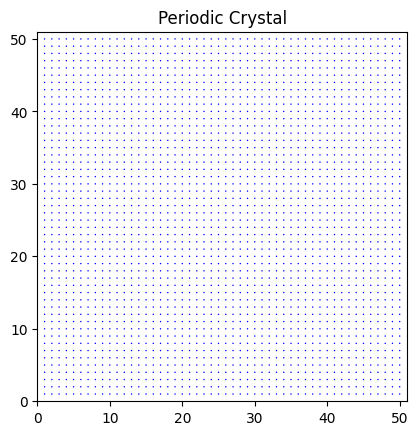

In [ ]:
#@title Periodic crystal generation
Lx = 50
Ly = 50
a = 1

coords = generate_periodic_crystal(Lx, Ly, a)

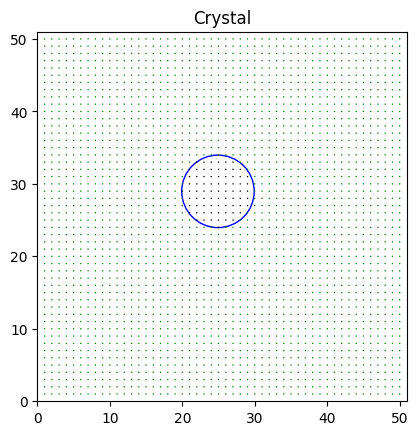

75


In [ ]:
#@title Drawing a random window on periodic crystal
points_inside_window = draw_random_window(coords, Lx, Ly, 5)
print(points_inside_window)

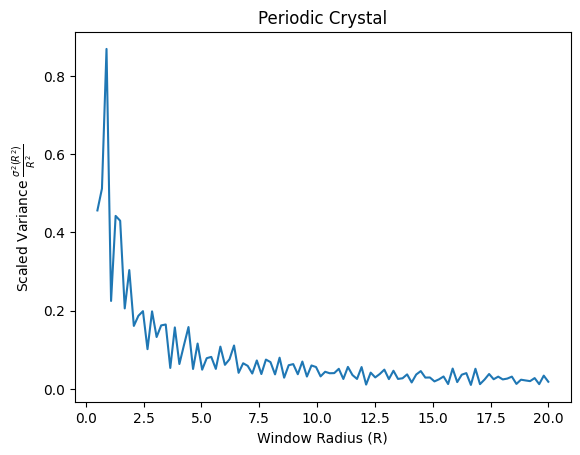

In [ ]:
#@title Calculation of variance of periodic structure
window_rad_list = np.linspace(0.5,20,100)
variance, points_inside_window_list = variance_of_structure(window_rad_list, coords, Lx,Ly)

plt.plot(window_rad_list, variance)
plt.title('Periodic Crystal')
plt.xlabel("Window Radius (R)")
plt.ylabel(r"Scaled Variance $\frac{\sigma^2(R^2)}{R^2}$ ")
plt.show()

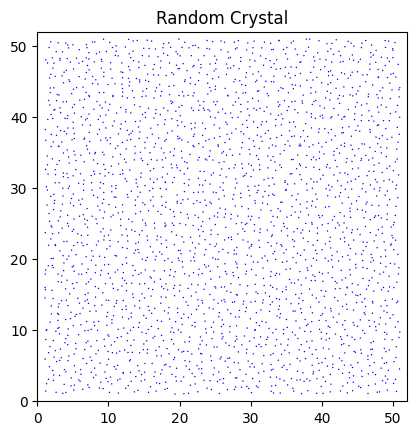

In [ ]:
#@title Generation of random crystal

displacement_range = [0, 1]
Lx = 50
Ly = 50
a = 1

coords = generate_random_crystal(Lx, Ly, a, displacement_range)

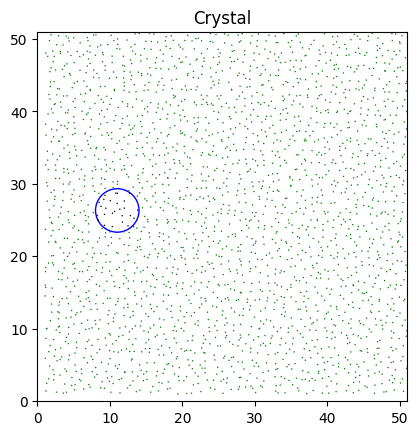

26


In [ ]:
#@title Drawing a random window on random crystal
points_inside_window = draw_random_window(coords, Lx, Ly, 3)
print(points_inside_window)

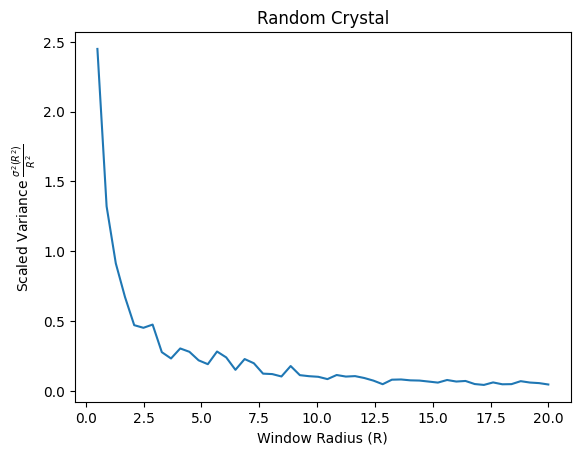

In [ ]:
#@title Calculation of variance of a random crystal
window_rad_list = np.linspace(0.5,20,50)
variance, points_inside_window_list = variance_of_structure(window_rad_list, coords, Lx,Ly)

plt.plot(window_rad_list, variance)
plt.title('Random Crystal')
plt.xlabel("Window Radius (R)")
plt.ylabel(r"Scaled Variance $\frac{\sigma^2(R^2)}{R^2}$ ")
plt.show()